# ---------------------------------------------
# CHALLENGE DESCRIPTION

Here attached a csv file containing a sample dataset consisting in (x, y) pairs on which you’ll have to perform a regression task.  

We ask you to work in a Jupyter notebook specifying the versions of Python (version 3.x please) and all libraries you use: when you’re done send us the notebook and we’ll execute it and check the results. As an alternative, you can also work in a script: just make sure the results from cross-validation are printed to screen when we execute it via the terminal, and that the plots get saved as files in png format in the same directory containing the script (send us a compressed archive with the script and the plots you produced).

To resume, here’s what you’ll need to do:

- (**yes**)     Open the file and read the data. 
- (**almost**)  Clean the data if needed. 
- (**yes**)     Plot the data. 
- (**yes**)     Fit two different regression models to the data (e.g. curves belonging to two different families).
- (**yes**)     Choose a metric for the evaluation of the models and perform the evaluation using cross-validation. 
- (**yes**)     Plot the predictions from the best model against the data. 
- (**yes**)     Specify python version and all the libraries used in the notebook 
- (**yes**)     Make sure that all the plots are saved in "png" format in the same directory of the file 
- (**no**)      Make sure that all the results from cross-validation are printed when executing the file via terminal! 
- (**no**)      Make sure that all gets executed on another computer and prepacked on compressed archives (script + plots!)

# ---------------------------------------------

# Analytics - Data Analytics Challenge Solution

## Prerequisites before running the notebook
Running the following jupyter notebook requires you to have installed on your PC the following packages:

- Python (version 3.7 or higher)
- Libraries:
    - jupyter
    - numpy
    - pandas
    - matplotlib
    - seaborn
    - sklearn
    - xgboost

## Outline of the notebook

1. Introduction: frame the problem
2. Retrieve and describe the dataset
3. Discover and visualize data for reacher insights 
4. Data cleaning (missing values)
5. Machine Learning Pipelines:
    - Model (1): Polynomial Regression Model
        1. Data prepocessing and model definition
        2. Model better evaluation using cross validation and fine-tuning model parameters using grid search
        3. Retrieve the optimal model 
    - Model (2): Ensemble Model (Gradient Boosting)
        1. Data preprocessing and model definition
        2. Model better evaluation using cross validation and fine-tuning model parameters using grid search
        3. Retrieve the optimal model
6. Get the best model (metric comparison)
7. Evaluate the system on the test set and plot the results
8. Conclusions

## (1) Introduction: frame the problem

**Description**: we are given a (csv) sample dataset consisting of (x, y) pairs on which we are required to perform a regression task. To be more specific, the assignment asks to: propose two different regression models, retrieve the best model through methods of metric evaluation and comparison between models and use it to plot the predictions against the data.  


## (2) Retrieve and describe the dataset
In this section we will open and read the file in order to conduct a preliminary analysis on the overall structure of the data. This is a fundamental step to get the first insights on how we should proceed in preparing data before modeling.

In [1]:
# Libraries for this section (and later ones)
import numpy as np
import pandas as pd

In [2]:
# Read and store the dataset
df = pd.read_csv("analytics_task_data.csv")

In [4]:
# Dimension of the dataset
df.shape

(500, 2)

We are dealing with a relative small dataset characterized by 500 observations and 2 features.

In [5]:
# Show the first few observations 
df.head()

,x,y
0,8.519119,48.073811
1,12.059918,302.657224
2,11.547357,247.531965
3,10.383055,127.686318
4,8.492261,55.086710


From the results above we can notice that the each observation is described by 2 numerical features. This gives further insights on the problem we need to tackle: build regression models to predict the target variable "y" using "x", the explanatory variable. 

In [6]:
# Dataset statistics
df.describe()

,x,y
count,488.000000,462.000000
mean,9.767819,133.752630
std,1.614540,91.797160
min,7.007803,10.443932
25%,8.380894,59.919619
50%,9.781597,104.201239
75%,11.122550,194.316855
max,12.498972,375.943890


Having two numerical features, we wish to extract more information by presenting some statistics. [TODO: True?] The first thing we can notice here is that the two features have different mean and standard deviation, which might suggest that they are sampled from the same distribution with different parameters or that they simply belong to different distributions. In any case, these differences can be ignored for our purposes since they have no consequences on our simple regression task outcomes. Indeed, this would be relevant in case we had multiple predictors with different scales and we wished to use them jointly to estimate the target variable "y".

Most importantly, we can notice that both columns present missing values, but in different proportions with respect to the overall sample size. This fact requires further attention and needs special treatments when it comes to data preparation.

In [7]:
# Any missing value?
if np.array(df.isnull().any()).any() == True: # TODO: 
    # store missing values information if any
    missing_data_sum = df.isnull().sum()
    # present statistics
    print(f"""Number of missing values :

            x: {missing_data_sum.x} ({missing_data_sum.x/df.shape[0] * 100}% over total sample size) 
            y: {missing_data_sum.y} ({missing_data_sum.y/df.shape[0] * 100}% over total sample size) 
            overall: {missing_data_sum.x+missing_data_sum.y} ({(missing_data_sum.x+missing_data_sum.x)/df.shape[0] * 100}% over total sample size)
    """)

Number of missing values :

            x: 12 (2.4% over total sample size) 
            y: 38 (7.6% over total sample size) 
            overall: 50 (4.8% over total sample size)
    


Each column presents few missing values, and if they are considered jointly, the overall percentage of total cases with respect to the sample size remains below 5%. At this point, there are two plausible options available that could be adopted in order to take care of the presence of missing observations. Each of these will be further discussed and analyzed in the section relative to data cleaning procedures.


## (3) Discover and visualize data for reacher insights
Here we wish to dig a bit more into the characteristics of our sample through further analysis and data visualization techniques. Visualizing data is a fundamental step in order to deepen the relationship between the predictor(s) and the target variable. The aim of this section is then to uncover relationships that might not be as evident by only analyzing raw data.

In [8]:
# Libraries for this section (and later ones)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
%matplotlib inline
sns.set(color_codes=True)

### Correlation analysis
Before proceeding with data visualization techniques, we wish to see how the two features are correlated to one another. In particular, the correlation analysis will give us evidence of the strength and direction of the linear relationship between the two variables under scrutiny. Such assessment can be given by analyzing the correlation coefficient:

In [9]:
# Remove missings to calculate correlation coefficient (null values would drop the coefficient to 0)
df_corr = df.dropna(axis=0)
# Retrieve correlation coefficient
corr_coefs = np.corrcoef(df_corr.x.values,df_corr.y.values)
# Get correlation coefficient out there!
print(f"Correlation coefficient between 'x' and 'y' amounts to: {round(corr_coefs[0][1],2)}")

Correlation coefficient between 'x' and 'y' amounts to: 0.95


The correlation coefficient between the explanatory and the target variables results to be highly positive. This suggests us that, in most of the cases, increasing one variable would imply higher values also for the other considered variable, and viceversa. This coefficient, along with a relatively high number of observations, is also signaling that the relationship might be modeled quite efficiently to predict future values. 

### Data visualization
Let's start with a simple scatter plot in order to see how the two features are related to each other and to look for evidence of what we saw through the correlation analysis 

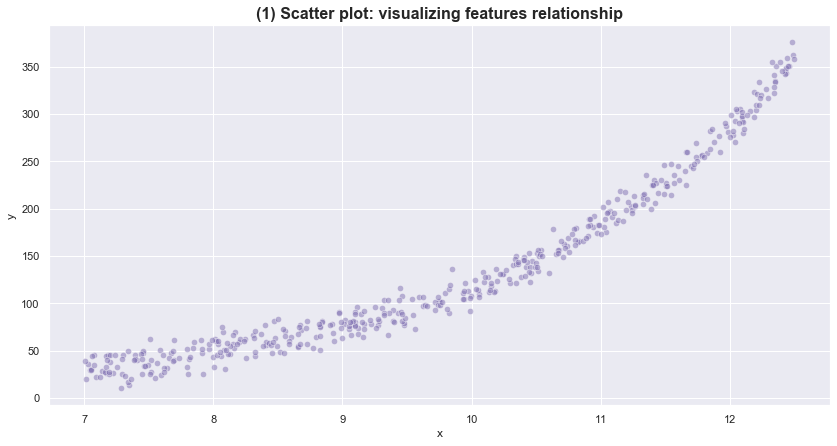

In [142]:
# First plot
plt.figure(figsize=(14,7))
plt.title("(1) Scatter plot: visualizing features relationship", fontsize=16, fontweight='bold')
scatter_plot = sns.scatterplot(x="x",y="y",data=df,s=40,color="m",alpha=0.50)

From the graph above we can notice that there is evidence of a strong relationship between the features. Furthermore, it seems from the graph that the relationship is non-linear. This would imply that, rather than sticking with a simple linear regression, we might need to add complexity in the model to better represent the trend highlighted here. If you are still not convinced, let's present further proofs using visualization techniques.

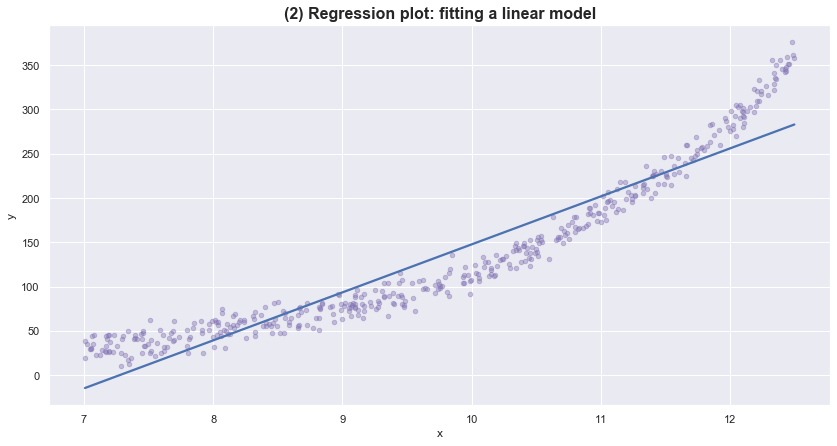

In [143]:
# Regression plot: scatter plot along with a fitted linear regression line 
plt.figure(figsize=(14,7))
plt.title("(2) Regression plot: fitting a linear model", fontsize=16, fontweight='bold')
reg_plot = sns.regplot(x="x", y="y", data=df, ci=None, scatter_kws={"s": 20, "color": "m","alpha": 0.40})

The graph above displays a scatter plot along with a fitted linear regression line. The model that presents this relationship may turn out to have a high score value (e.g. high R-Squared), but it would be relatively low given the evident trend represented in the graph. Indeed, it would almost certainly underfit the data. In other words, if we fit a linear regression model with the above observations, there is high chance that it would be unable to accurately predict on unobserved data. As we already discussed before, in order to reach a better result, we could introduce complexity in the model. Let's see an example:

Text(0.5, 1, '(3) Regression plot: introducing non-linearity')

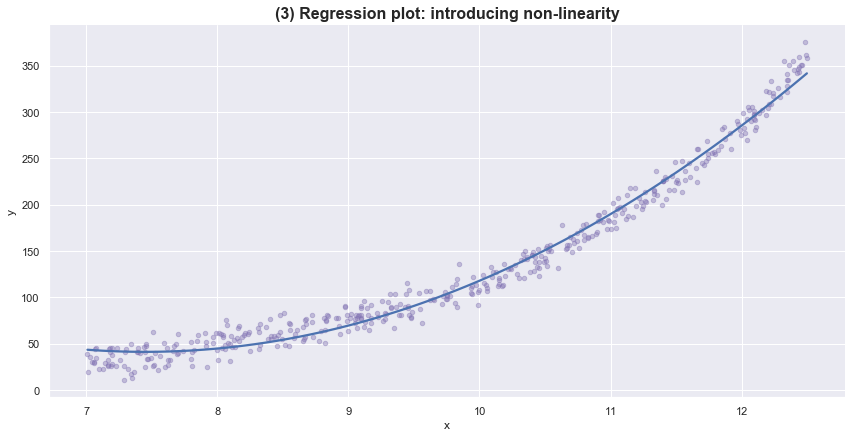

In [144]:
# Regression plot: scatter plot along with a 2-degree polynomial regression model
reg_plot_non_lin = sns.lmplot(x="x", y="y", data=df, order=2, ci=None, height=6, aspect=2, scatter_kws={"s": 20, "color": "m", "alpha":0.40})
ax = plt.gca()
ax.set_title("(3) Regression plot: introducing non-linearity",fontsize=16,fontweight='bold')

The graph above still represents a scatter plot along with a regression plot, but this time we configured it in such a way that it tries to fit a polynomial regression model on the data. The only difference with respect to the previous graph is the regression equation: rather than being linear, now it is quadratic. This little difference seems to be enough to get a more accurate model. 

One thing to notice here is that we set the order of the polynomial equation to 2. Configuring the model as such is enough to introduce non-linearity and complexity. However, from the graph it is clear that the line does not perfectly fit the data. Therefore, the question we wish to answer at this point is: can we do better than this by introducing additional complexity or by estimating using different models?

## (4) Data cleaning (Missing values)
In this section we wish to take care of issues that may arise from the data before proceeding to the modeling phase. In particular, we will continue from the analysis of missing values we conducted before.

### Dropping values?
As we have seen above, both the explanatory and the dependent variables present cases of missing values that we need to take care of before proceeding. Given that the overall percentage of missing values is below 5% and the clear trend already highlighted by the remaining data, dropping these observations seems to be the best option. 

### Imputing values?
A question that may arise at this point is whether we could find a way to impute the data rather than just dropping them. 

Considering a simple imputer (e.g. one using mean or median strategy to impute the values), it would not work properly here as it would tend to approximate values towards a single point with the consequence of introducing biased information. Another approach we could consider here is to impute them based on a K-Nearest-Neighbor imputer, which fits the data based on the characteristics of the K-th nearest observations and transform the missing data accordingly. On the one hand, given the strong evidence of a trend in the data, imputing the missing values would probably improve the model performances considerably, but on the other hand it might actually degenerate model predictive power due to additional assumptions on the structure of the data.

In [14]:
# (Dropping) -> choose to drop values
df.dropna(axis=0,subset=["x","y"], inplace=True)

## (5) Machine Learning Pipeline
Here comes the fun part! In this section we will build two different regression model. We will first create a polynomial regression model and then we will see whether, by introducing an ensemble model, we can increase performances. To compute all the steps required to get the optimal model in a clear and nice fashion, we will make use of pipelines. One of the most important advantages of such approach is that you get a comprehensive object (the pipeline indeed) that can include data preprocessing, modeling, cross-validation and grid search procedures in one single object. Once defined, all you are required to do in order to get predictions is to instantiate the pipeline and invoke the proper method on the test data. The latter will automatically trigger the same preprocessing that was performed on the training data and returns the predictions.  

In [15]:
# Libraries for this section (and later ones)

# Classes inherited by transformers
from sklearn.base import BaseEstimator,TransformerMixin

# 1st model (Polynomial Regression Model)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# 2nd model (Ensemble Model: Gradient Boosting)
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

### Utilities
Here we introduce two utilities: the first one being a customized column transformer to pass to the pipeline in order to get the proper shape of the data for the regression task, while the second is a dictionary containing two different metrics that will be injected into the GridSearchCV object to be used during the cross validation procedure to better evaluate a model performance. 

**N.B**. Despite the presence of two different evaluation metrics, cross validation will perform evaluation only using one of the two metrics. The second metric is provided in order to get a different perspective on the model performances.

In [19]:
# Column transformer to reshape the data before regression
class ReshapeTransformer(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        return x.values.reshape(-1,1)

In [20]:
# Scoring metrics dictionary
scoring={
    "r2":"r2",
    "neg_mean_squared_error":"neg_mean_squared_error"
}

### (5.1) Model 1. Polynomial Regression Model
Here we define our first model: a polynomial regression model. In particular, we start by declaring a range of possible polynomial degrees as a parameter that will be injected into the pipeline to obtain the optimal model.

In [21]:
# Parameters for GridSearch in polynomial regression
param_grid_poly = {
    "polynomialfeatures__degree": range(2,31) # Define a range of possible polynomial degrees (from x**2 to x**30 [high-degree polynomial])
}

#### (5.1.1) Data prepocessing and model definition
The following method arrange all the prepocessing and model objects to be passed to the pipeline, which is eventually returned by the function

In [26]:
# Pipeline for the polynomial regression model
def get_pipeline_poly():
    # Column reshaping transformer
    my_reshape_transformer = ReshapeTransformer()
    # # KNN-based imputer
    # my_knn_imputer = KNNImputer()
    # Polynomial-degree transformer 
    my_poly_transformer = PolynomialFeatures()
    # Define the model
    my_poly_model = LinearRegression()
    # Define and return the pipeline: bundle together data preprocessing and model definition
    return make_pipeline(my_reshape_transformer, my_poly_transformer, my_poly_model)

#### (5.1.2) Model better evaluation using cross validation and fine-tuning model parameters using grid search
The following method retrieves the pipeline, which then passed to the grid search optimization procedure. When the "fit" method is called, the procedure goes all the way through the pipeline to optimize the parameters while balancing between underfitting and overfitting models and return the optimal one.

In [27]:
# Get the optimal polynomial model
def get_optimal_poly(x=df.x,y=df.y,param_grid=param_grid_poly):
    # Retrieve the relative pipeline
    my_poly_pipeline = get_pipeline_poly()
    # istantiate the grid search object to perform parameter optimization and cross validation procedures based on negative MSE metric
    my_poly_optimal_model = GridSearchCV(my_poly_pipeline,param_grid,cv=5,scoring=scoring,refit="neg_mean_squared_error",verbose=0)
    # Fits the data and finds the best parameters according to GridSearchCV
    my_poly_optimal_model.fit(x,y)
    # Return the optimal polynomial model
    return my_poly_optimal_model

#### (5.1.3) Retrieve the optimal model
Istantiating the optimal polynomial model and print statistics

In [28]:
# Instantiate the optimal polynomial model
my_poly_optimal = get_optimal_poly()

In [29]:
# Get the optimal degree for polynomial regression equation
optimal_degree = my_poly_optimal.best_params_["polynomialfeatures__degree"]
# Print the optimal degree for polynomial features 
print(f"The optimal degree for polynomial features in the polynomial regression model is: {optimal_degree}")

The optimal degree for polynomial features in the polynomial regression model is: 6


In [30]:
# Get the metrics
poly_metrics = my_poly_optimal.cv_results_
# RMSE (Root Mean Squared Error)
print(f"Best polynomial regression model MSE: {(-1)*max(poly_metrics['mean_test_neg_mean_squared_error'])}")
# R2 (R-Squared)
print(f"Best polynomial regression model R2: {max(poly_metrics['mean_test_r2'])}")

Best polynomial regression model MSE: 100.86249894734247
Best polynomial regression model R2: 0.9874398493694626


### (5.2) Model 2. Ensemble Model (Gradient Boosting)
Here we go with our second model: Gradient Boosting. Being an ensemble model, Gradient Boosting works in a different way with respect to the polynomial regression model we introduced before. In particular, what the model tries to do here (in simple words) is to start with a base learner defined with defualt parameters (if not specified) and it iteratevly add other base learners into an ensemble model with the aim of improving at each cycle the model performances on the data. How? By minimizing the cost function using the gradient descending algorithm. 

Furthermore, gradient boosting gives high degree of flexibility in setting parameters of the base learners and this is the reason why we chose him as the second model. What we wish to do with this model is to see whether, based on the result we achieved with the first model, we are able to set the parameters to further increase model performances while avoiding overfitting.

In [133]:
# Parameter grid containing the possible parameters values to be optimized through GridSearchCV. Each parameter will be passed through the pipeline and will be assigned to the object name accordingly
param_grid_ensemble = {
    "polynomialfeatures__degree": [optimal_degree], # already optimized in the previous model
    "xgbregressor__objective": ["reg:squarederror"], 
    "xgbregressor__booster": ["gblinear"], # change to GLM (Generalized Least Square) rather than tree-based learners
    "xgbregressor__learning_rate": [0.05], # percentage of contribution of each new base learner 
    "xgbregressor__n_estimators": [5000], # number of base learners iteratively trained
    "xgbregressor__early_stopping_rounds": [5], # rounds of straight deterioration allowed before stopping
    "xgbregressor__gamma": [5,10], # regularization
}

#### (5.2.1) Data prepocessing and model definition

In [134]:
# Pipeline for the ensemble model
def get_ensemble_pipeline():
    # Column reshaping transformer
    my_reshape_transformer = ReshapeTransformer()
    # [TODO] Standardize columns to increase gradient descending performance
    my_standardizer_transformer = StandardScaler() 
    # Get the proper polynomial features in the data
    my_poly_transformer = PolynomialFeatures()
    # Define the model
    my_ensemble_model = XGBRegressor()
    # Define and return the pipeline for the ensemble method
    return make_pipeline(my_reshape_transformer,my_standardizer_transformer,my_poly_transformer,my_ensemble_model)

#### (5.2.2) Model better evaluation using cross validation and fine-tuning model parameters using grid search

In [135]:
# Retrieve the optimal Gradient Boosting model 
def get_optimal_ensemble(x=df.x,y=df.y,param_grid=param_grid_ensemble):
    # Retrieve the relative pipeline
    my_pipeline = get_ensemble_pipeline()
    # Istantiate the grid search object to perform parameter optimization and cross validation procedures based on negative MSE metricng
    my_ensemble_model = GridSearchCV(my_pipeline,param_grid,cv=5,scoring=scoring,refit="neg_mean_squared_error",verbose=3)
    # Fits the data and finds the best parameters according to GridSearchCV
    my_ensemble_model.fit(x,y)
    # Return the optimal ensemble model
    return my_ensemble_model

#### (5.2.3) Retrieve the optimal model

In [136]:
# Istantiate the optimal ensemble model
my_ensemble_optimal = get_optimal_ensemble()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] polynomialfeatures__degree=6, xgbregressor__booster=gblinear, xgbregressor__early_stopping_rounds=5, xgbregressor__gamma=5, xgbregressor__learning_rate=0.05, xgbregressor__n_estimators=5000, xgbregressor__objective=reg:squarederror 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  polynomialfeatures__degree=6, xgbregressor__booster=gblinear, xgbregressor__early_stopping_rounds=5, xgbregressor__gamma=5, xgbregressor__learning_rate=0.05, xgbregressor__n_estimators=5000, xgbregressor__objective=reg:squarederror, neg_mean_squared_error=-110.731, r2=0.988, total=   0.8s
[CV] polynomialfeatures__degree=6, xgbregressor__booster=gblinear, xgbregressor__early_stopping_rounds=5, xgbregressor__gamma=5, xgbregressor__learning_rate=0.05, xgbregressor__n_estimators=5000, xgbregressor__objective=reg:squarederror 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV]  p

In [137]:
# Get the metrics
ensemble_metrics = my_ensemble_optimal.cv_results_
# RMSE (Root Mean Squared Error)
print(f"Best ensemble model MSE: {(-1)*max(ensemble_metrics['mean_test_neg_mean_squared_error'])}")
# R2 (R-Squared)
print(f"Best ensemble model R2: {max(ensemble_metrics['mean_test_r2'])}")

Best ensemble model MSE: 102.8683258710789
Best ensemble model R2: 0.9873164138791563


In [138]:
my_ensemble_optimal.best_params_

{'polynomialfeatures__degree': 6,
 'xgbregressor__booster': 'gblinear',
 'xgbregressor__early_stopping_rounds': 5,
 'xgbregressor__gamma': 10,
 'xgbregressor__learning_rate': 0.05,
 'xgbregressor__n_estimators': 5000,
 'xgbregressor__objective': 'reg:squarederror'}

## (6) Get the best model (metric comparison)
Here we wish to obtain the best performing model between the two proposed above by comparing their evaluation metrics

In [139]:
# Check which model has the lowest averaged mean squared error (MSE) on test set

# Retrieve the best scores from both models (multiplied by (-1) due to negative valued metrics)
best_score_poly = (-1)*my_poly_optimal.best_score_
best_score_ensemble = (-1)*my_ensemble_optimal.best_score_

# Retrieve and store the optimal model
if best_score_poly < best_score_ensemble:
    print(f"The best performing model is Polynomial Regression Model with a MSE of: {best_score_poly}")
    my_best_model = my_poly_optimal
else:
    print(f"The best performing model is Polynomial Regression Model with a MSE of: {best_score_ensemble}")
    my_best_model = my_ensemble_optimal

The best performing model is Polynomial Regression Model with a MSE of: 100.86249894734247


# (7) Evaluate the system on a test set and plot the results
Here we plot the predictions from out best model against the true observations

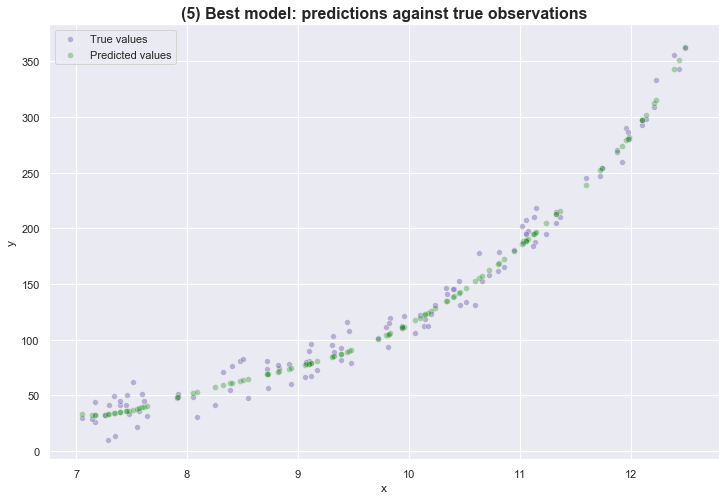

In [140]:
# Divide data into train-test
x_train_best,x_test_best,y_train_best,y_test_best = train_test_split(df.x,df.y)

# Target prediction using the best model
y_preds_best = my_best_model.predict(x_test_best)

# PLOT
# (1) Configure graph
plt.figure(figsize=(12,8))
plt.title("(5) Best model: predictions against true observations",fontsize=16,fontweight='bold')
# (2) True data
sns.scatterplot(x=x_test_best, y=y_test_best, color='m', alpha=0.5, label="True values")
# (3) Best model predictions
sns.scatterplot(x=x_test_best, y=y_preds_best, color='green', alpha=0.3, label="Predicted values")
# (4) Save the graph
plt.savefig("5_true_preds_plot.png",dpi=300)

# (8) Conclusions

# (Bonus) Additional content 

# [TODO] Script: save ALL the plots!

In [145]:
# Save all the plots produced
scatter_plot.figure.savefig("1_scatter_plot.png",dpi=300)
reg_plot.figure.savefig("2_regression_plot.png",dpi=300)
reg_plot_non_lin.savefig("3_regression_plot_non_lin.png",dpi=300)